In [1]:
from matplotlib import pyplot as plt
import pandas as pd

import sys, os
sys.path.insert(0, os.path.abspath('../scripts/'))
import footyviz

# Utils

In [2]:
# For each play, we add to ball coordinates at each frame and for each player :
def _add_ball_coordinates(dataframe: pd.DataFrame) -> pd.DataFrame:
    
    list_of_plays = list(data.index.get_level_values('play').unique())
    
    #First, a function to compute this for one play at a time : 
    def _add_coord(df):
        # Getting the balls infos: 
        df_ball = df[df['edgecolor'] == 0]
        
        df_ball = df_ball[['frame','x','y','z']]
        df_ball.rename(columns = {'x': 'ball_x',
                                  'y': 'ball_y',
                                  'z':'ball_z'},inplace = True)
        
        df = df.merge(df_ball, on = 'frame', how = 'left')
        df = df.drop(columns = ['Unnamed: 0'])
        return df 
    
    for i,play in enumerate(list_of_plays):
        
        df = data.loc[play]
        df = df.reset_index()
        
        if i == 0:
            new_dataframe = _add_coord(df)
            new_dataframe['play'] = play
        else:
            df = _add_coord(df)
            df['play'] = play
            new_dataframe = pd.concat([new_dataframe,df])
            
    return new_dataframe
            

In [3]:
# We now add a boolean to mark the possession of the ball by a player
def _add_possession(dataframe: pd.DataFrame) -> pd.DataFrame:
    
    dataframe['possession'] = False
    columns = list(dataframe.columns.values)
    tab = dataframe.values 
    
    for line in tab:
        #Not ocmputing for the ball :
        if line[4] != 0:
            if ((line[8] - line[11])**2 + (line[9] - line[12])**2 < 1):
                line[-1] = True
                #Test to display later :
                line[4] = 'black'
                
    dataframe = pd.DataFrame(tab, columns = columns)
    return dataframe

# Loading Data



In [4]:
data = pd.read_csv('../datasets/positional_data/liverpool_2019.csv', index_col=('play', 'frame'))
data.tail()


Unnamed: 0 bgcolor   dx   dy edgecolor  \
play                        frame                                           
Leicester 0 - [3] Liverpool 120          2745    blue  0.0  0.0     white   
                            121          2746    blue  0.0  0.0     white   
                            122          2747    blue  0.0  0.0     white   
                            123          2748    blue  0.0  0.0     white   
                            124          2749    blue  0.0  0.0     white   

                                   player  player_num     team          x  \
play                        frame                                           
Leicester 0 - [3] Liverpool 120     10267         NaN  defense  98.724826   
                            121     10267         NaN  defense  98.724826   
                            122     10267         NaN  defense  98.724826   
                            123     10267         NaN  defense  98.724826   
                            124     10267         NaN  defense  98.724826   

                                           y    z  
play                        frame                  
Leicester 0 - [3] Liverpool 120    53.720353  0.0  
                            121    53.720353  0.0  
                            122    53.720353  0.0  
                            123    53.720353  0.0  
                            124    53.720353  0.0

In [5]:
data['edgecolor'] = data['edgecolor'].fillna(0)

In [6]:
data_test = _add_ball_coordinates(data)
data_test = _add_possession(data_test)

In [7]:
data_test['play'].unique()

array(['Liverpool [3] - 0 Bournemouth', 'Bayern 0 - [1] Liverpool',
       'Fulham 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool',
       'Liverpool [2] - 0 Porto', 'Porto 0 - [2] Liverpool',
       'Liverpool [4] - 0 Barcelona', 'Liverpool [1] - 0 Wolves',
       'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 1 Chelsea',
       'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg',
       'Genk 0 - [3] Liverpool', 'Liverpool [2] - 0 Man City',
       'Liverpool [1] - 0 Everton', 'Liverpool [2] - 0 Everton',
       'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Watford',
       'Leicester 0 - [3] Liverpool'], dtype=object)

In [8]:
play = 'Leicester 0 - [3] Liverpool'
df = data_test[data_test['play'] == play]
df = df.set_index('frame')
df.tail()

bgcolor dx dy edgecolor player player_num     team        x        y  z  \
frame                                                                           
120      blue  0  0     white  10267        NaN  defense  98.7248  53.7204  0   
121      blue  0  0     white  10267        NaN  defense  98.7248  53.7204  0   
122      blue  0  0     white  10267        NaN  defense  98.7248  53.7204  0   
123      blue  0  0     white  10267        NaN  defense  98.7248  53.7204  0   
124      blue  0  0     white  10267        NaN  defense  98.7248  53.7204  0   

       ball_x  ball_y ball_z                         play possession  
frame                                                                 
120    100.68  44.958      0  Leicester 0 - [3] Liverpool      False  
121    100.68  44.958      0  Leicester 0 - [3] Liverpool      False  
122    100.68  44.958      0  Leicester 0 - [3] Liverpool      False  
123    100.68  44.958      0  Leicester 0 - [3] Liverpool      False  
124    100.68  44.958      0  Leicester 0 - [3] Liverpool      False

# Basic Plotting

You may have noticed I picked an interesting goal. It was my favorite football moment from 2019: a simple corner taken quickly.

/Users/paulgarnier/Documents/github/Last-Row/scripts/footyviz.py:145: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  head_length=arrow_length/4.)


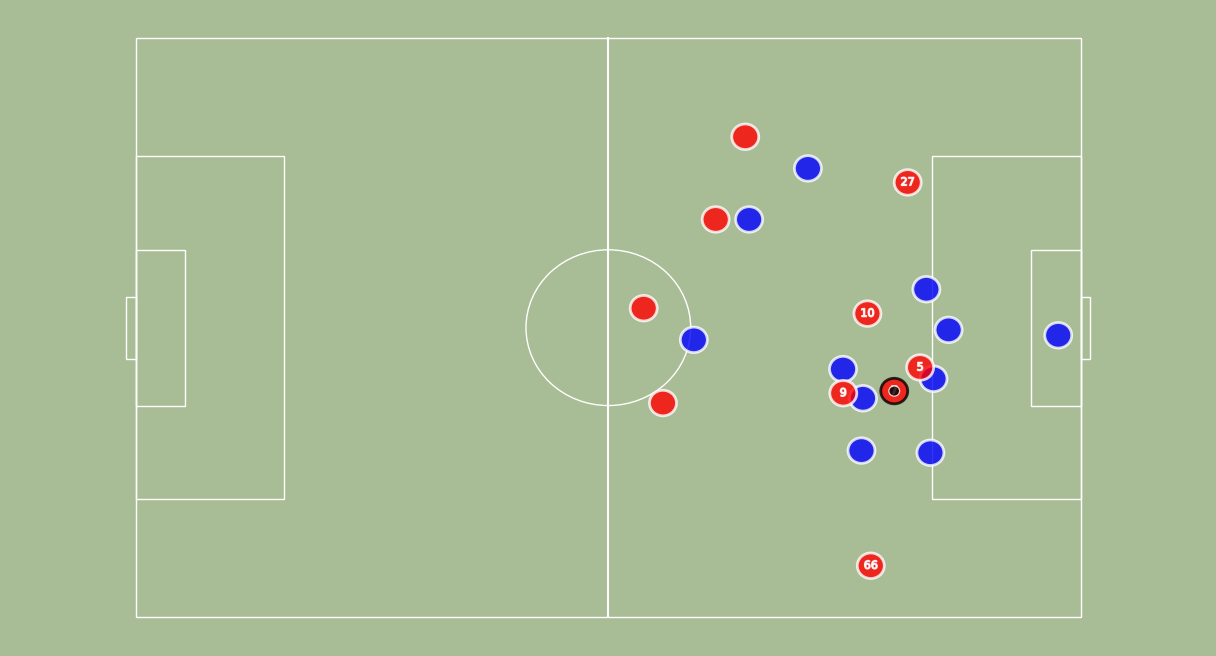

In [9]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=0,add_vector = True)

This was probably what was on Trent Alexander-Arnold's head:

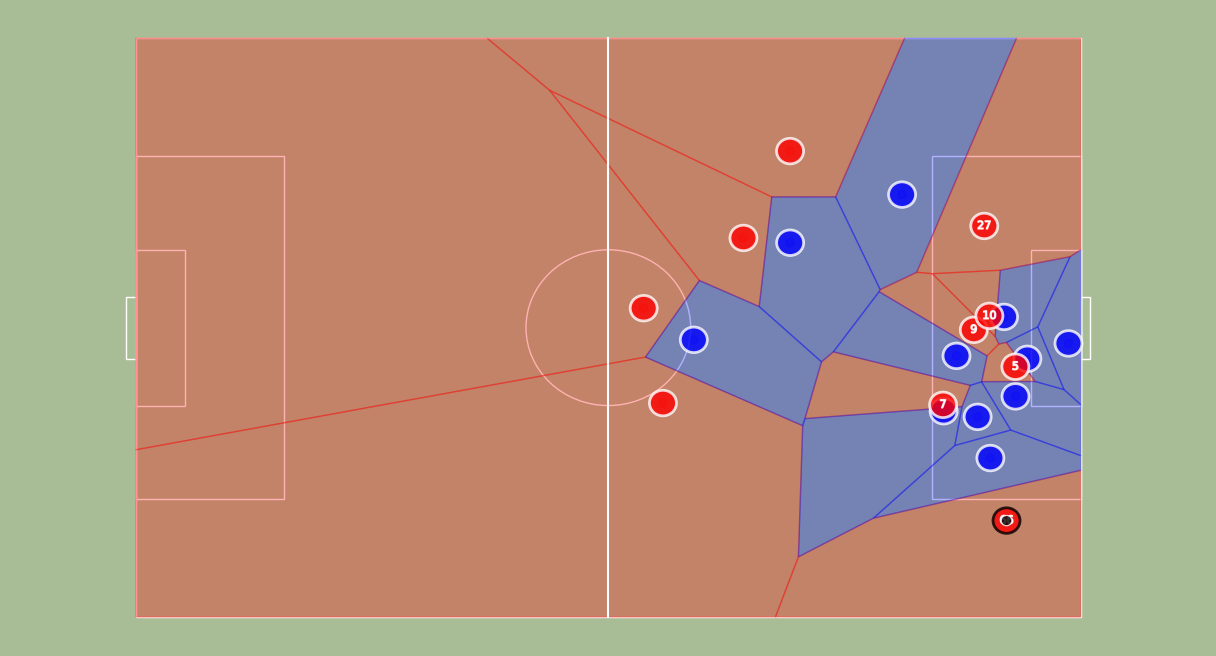

In [10]:
fig, ax, dfFrame = footyviz.draw_frame(df, t=3)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)

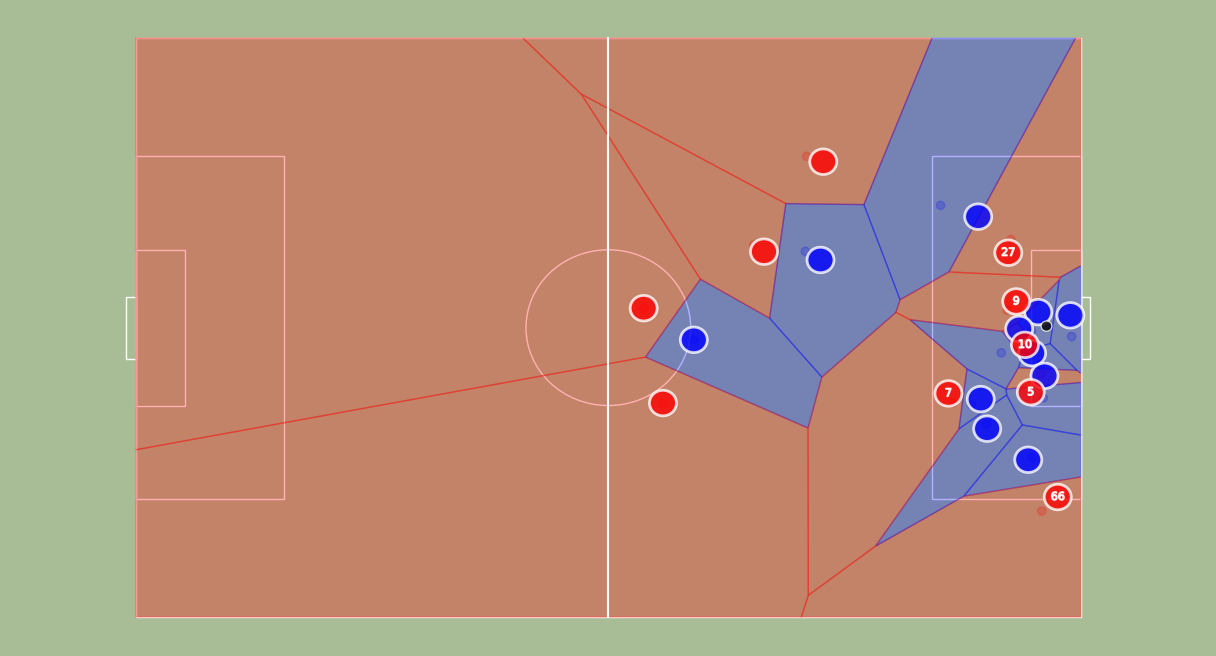

In [11]:
#you can mix different frames for the player's positioning and for the voronoi (e.g. fixing the voronoi to the time of the pass)
fig, ax, dfFrame = footyviz.draw_frame(df, t=5)
dfFrame_for_voronoi = footyviz.get_frame(df, t=4)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame_for_voronoi)

# MoviePy

MoviePy is a Python module for video editing that works nicely with matplotlib and Jupyter and is built on top of FFmpeg. You may think you never used FFMpeg, but you have. From Wikipedia:

> FFmpeg is used by software such as VLC media player, xine, Cinelerra-GG video editor, Plex, Kodi, Blender, HandBrake, YouTube, and MPC-HC; it handles video and audio playback in Google Chrome, and Linux version of Firefox. 

You can find MoviePy's documentation at: https://zulko.github.io/moviepy/

Let's start with a basic animation:

In [12]:
from moviepy import editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage
import matplotlib.pyplot as plt


In [13]:
df_value = pd.read_csv('liverpool_value_leicester.csv')
df_value = df_value.drop(columns = ['Unnamed: 0'])

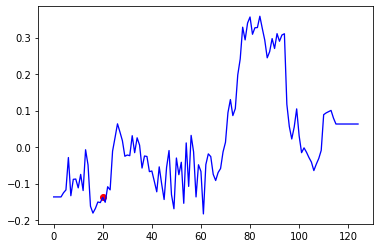

In [15]:
t = 1.0
fps = 20
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_value['frame_count'].values, df_value['value'].values, color='blue', linewidth=1.3)
ax.scatter(df_value.values[int(t*fps)][0], df_value.values[int(t*fps)][1], color='red', marker='o')
plt.show()

In [16]:
from scipy.signal import savgol_filter

In [22]:
yhat = savgol_filter(df_value['value'], 21, 3)

In [23]:
len(yhat)

125

In [24]:
df_value['Value_smooth'] = yhat

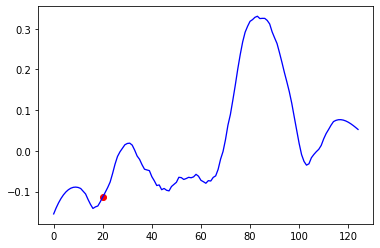

In [27]:
t = 1.0
fps = 20
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_value['frame_count'].values, df_value['Value_smooth'].values, color='blue', linewidth=1.3)
ax.scatter(df_value.values[int(t*fps)][0], df_value.values[int(t*fps)][3], color='red', marker='o')
plt.show()

In [33]:
def draw_line(df_value,t,fps):
    fig = plt.figure(figsize=(19.2, 10.8), dpi=100)
    ax = fig.add_subplot(111)
    ax.plot(df_value['frame_count'].values, df_value['Value_smooth'].values, color='blue', linewidth=1.3)
    ax.scatter(df_value.values[int(t*fps)][0], df_value.values[int(t*fps)][3], color='red', marker='o')
    image = mplfig_to_npimage(fig)
    plt.close()
    return image    
def make_animation(df, fps=20, voronoi=True):
    #calculated variables
    length=(df.index.max()+20)/fps
    clip = mpy.VideoClip(lambda x: draw_line(df, t=x, fps=fps), duration=length-1).set_fps(fps)
    return clip

In [35]:
clip1 = make_animation(df_value)

#clip.ipython_display()
clip1.write_videofile("Goal_value.mp4")

t:   2%|▏         | 3/124 [00:00<00:05, 22.29it/s, now=None]

Moviepy - Building video Goal_value.mp4.
Moviepy - Writing video Goal_value.mp4



Moviepy - Done !
Moviepy - video ready Goal_value.mp4


In [88]:
def draw_line_(df_value,t,fps):
    fig = plt.figure(figsize=(12.8, 7.2), dpi=100)
    ax = fig.add_subplot(111)
    ax.plot(df_value['frame_count'].values, df_value['dValue'].values, color='lightgreen', linewidth=1)
    ax.scatter(df_value.values[int(t*fps)][0], df_value.values[int(t*fps)][2], color='red', marker='o')
    image = mplfig_to_npimage(fig)
    plt.close()
    return image    
def make_animation(df, fps=20, voronoi=True):
    #calculated variables
    length=(df.index.max()+20)/fps
    clip = mpy.VideoClip(lambda x: draw_line_(df, t=x, fps=fps), duration=length-1).set_fps(fps)
    return clip

In [89]:
clip2 = make_animation(df_value)

#clip.ipython_display()
#clip.write_videofile("Goal_dvalue.mp4")

In [30]:
from moviepy import editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

def draw_frame_x(df, t, fps, voronoi=True):
    fig,ax,dfFrame = footyviz.draw_frame(df, t=t, fps=fps,add_vector = True)
    if voronoi:
        fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
    image = mplfig_to_npimage(fig)
    plt.close()
    return image    

def make_animation(df, fps=20, voronoi=True):
    #calculated variables
    length=(df.index.max()+20)/fps
    clip = mpy.VideoClip(lambda x: draw_frame_x(df, t=x, fps=fps, voronoi=voronoi), duration=length-1).set_fps(fps)
    return clip

clip3 = make_animation(df)

#clip3.ipython_display()
#clip3.write_videofile("Goal.mp4")

In [31]:
from moviepy.editor import VideoFileClip, clips_array, vfx

final_clip = clips_array([[clip1],
                          [clip3]])

In [32]:
final_clip.write_videofile("GoalwithValueonlyLeicester.mp4")

t:   0%|          | 0/124 [00:00<?, ?it/s, now=None]

Moviepy - Building video GoalwithValueonlyLeicester.mp4.
Moviepy - Writing video GoalwithValueonlyLeicester.mp4



Moviepy - Done !
Moviepy - video ready GoalwithValueonlyLeicester.mp4


This isn't much different from what you can do with Matplotlib's native animate capabilities.

The advantage of having MoviePy in the mix is having easy accsess to editing, compositing and transformation functions. Let's try some examples:

In [23]:
clip.rotate(90).ipython_display()

t:   0%|          | 0/138 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [24]:
#moviepy allows for method chaining several effects in one line of code:
clip.rotate(90).crop(y1=100, y2=500).ipython_display()

t:   0%|          | 0/138 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


Linear editing is easy with the ``subclip`` method (for trimming) and ``concatenate_videoclips`` function (to join clips):

In [29]:
full_clip = mpy.concatenate_videoclips([make_animation(data.loc[play]) for play in data.index.get_level_values('play').unique()])

print('normal speed:', full_clip.duration, 'seconds')
print('2x speed:', full_clip.speedx(2).duration, 'seconds')

full_clip.ipython_display(t=50)
full_clip.write_videofile("AllGoals.mp4")

normal speed: 176.5 seconds
2x speed: 88.25 seconds


t:   0%|          | 0/3530 [00:00<?, ?it/s, now=None]

Moviepy - Building video AllGoals.mp4.
Moviepy - Writing video AllGoals.mp4



Moviepy - Done !
Moviepy - video ready AllGoals.mp4


Non-linear editing uses the ``CompositeClip`` object:


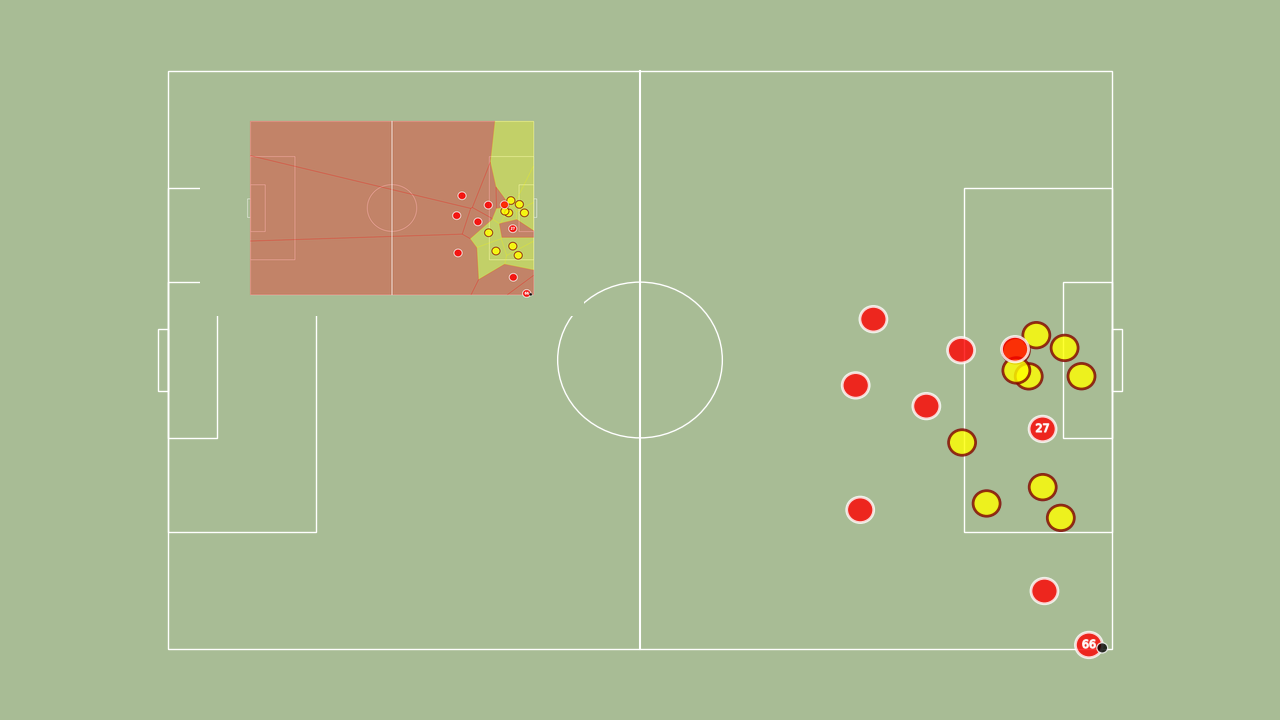

In [30]:
clip_voronoi = make_animation(df, voronoi=True)
composite_clip = mpy.CompositeVideoClip([clip, clip_voronoi.resize(0.3).set_position((200,100))])
composite_clip.ipython_display(t=4)